# Exploratory Data Analysis for: Astronomical Object Classification from The Sloan Digital Sky Survey Observations

## Load Data
* Read Data into pandas df
* Inspect the df size and columns

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split

filename ='data/star_classification.csv'
sdss17_df_raw = pd.read_csv(filename)

num_rows = np.shape(sdss17_df_raw)[0]
num_cols = np.shape(sdss17_df_raw)[1]
print(f"DataFrame Initially has #Cols:{num_rows} and #Rows:{num_cols}", end='\n\n')

print(f"The Cols are:", end="\n\n")
print(sdss17_df_raw.dtypes)

DataFrame Initially has #Cols:100000 and #Rows:18

The Cols are:

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object


In [3]:
sdss17_df_raw

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


## Removing an ID numbers and meta data - Spectroscopic Observations only

In [4]:
sdss17_df = sdss17_df_raw.drop(['obj_ID', 'alpha', 'delta', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'fiber_ID', 'spec_obj_ID', 'MJD', 'plate'], axis = 1)

## Remove problematic very bright objects not of interest (I suspect The Moon)

In [6]:
# Remove Very Bright Objects (The Moon?)
sdss17_df_no_anomaly = sdss17_df[sdss17_df['u'] > -1] # no moon?

num_rows = np.shape(sdss17_df_no_anomaly)[0]
num_cols = np.shape(sdss17_df_no_anomaly)[1]
print(f"DataFrame now has #Cols:{num_rows} and #Rows:{num_cols}", end='\n\n')


DataFrame now has #Cols:99999 and #Rows:7



In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Random test data

Classes = sdss17_df_no_anomaly['class'].unique()
 
redshift = sdss17_df_no_anomaly[['redshift', 'class']]

galaxy =  sdss17_df_no_anomaly[sdss17_df_no_anomaly['class'] == 'GALAXY']
qso =  sdss17_df_no_anomaly[sdss17_df_no_anomaly['class'] == 'QSO'] 
star =  sdss17_df_no_anomaly[sdss17_df_no_anomaly['class'] == 'STAR']

colors = ['mediumslateblue', 'indianred', 'mediumaquamarine']

## Exploring the differences between Galaxies, QSOs and Stars

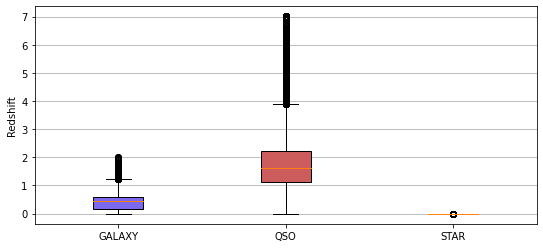

In [8]:
data = [galaxy['redshift'], qso['redshift'], star['redshift']]

fig, ax1 = plt.subplots(figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=Classes)  # will be used to label x-ticks
#ax1.set_title('Rectangular box plot')

# fill with colors


for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines

ax1.yaxis.grid(True)
#ax.set_xlabel('Three separate samples')
ax1.set_ylabel('Redshift')

plt.savefig('img/redshiftbox.png')
plt.show()


In [15]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
le = LabelEncoder()
sdss17_df_no_sun["class"] = le.fit_transform(sdss17_df_no_sun["class"])
sdss17_df_no_sun["class"] = sdss17_df_no_sun["class"].astype(int)

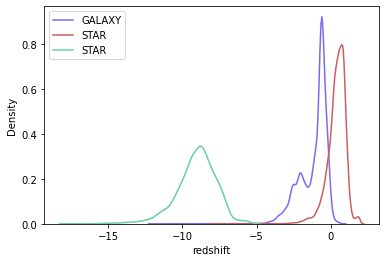

In [24]:


for i in range(3):
    sns.kdeplot(data=np.log(sdss17_df_no_sun[sdss17_df_no_sun["class"] == i]['redshift']), label = le.inverse_transform([i]), color=colors[i])
#sns.kdeplot(data=np.log(sdss17_df_no_sun['redshift']),label = ["All"])
Classes = ['GALAXY', 'STAR', 'STAR']
plt.legend(Classes);




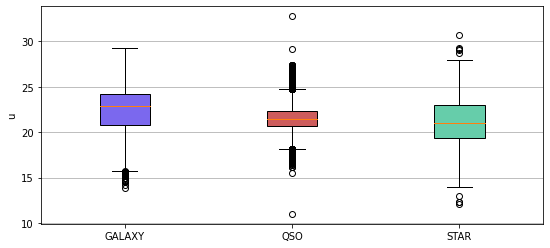

In [84]:

data = [galaxy['u'], qso['u'], star['u']]

fig, ax1 = plt.subplots(figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=Classes)  # will be used to label x-ticks

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines

ax1.yaxis.grid(True)
#ax.set_xlabel('Three separate samples')
ax1.set_ylabel('u')

plt.savefig('img/ubox.png')
plt.show()

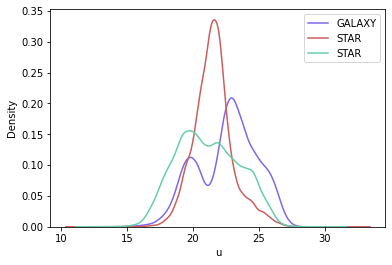

In [25]:

for i in range(3):
    sns.kdeplot(data=sdss17_df_no_sun[sdss17_df_no_sun["class"] == i]['u'], label = le.inverse_transform([i]), color=colors[i])

plt.legend(Classes);

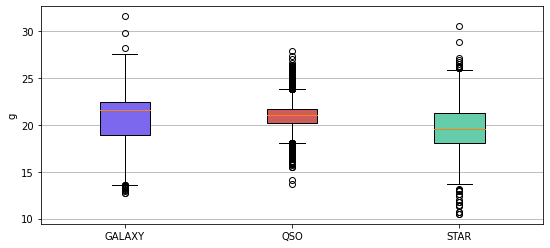

In [11]:
data = [galaxy['g'], qso['g'], star['g']]

fig, ax1 = plt.subplots(figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=Classes)  # will be used to label x-ticks

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines

ax1.yaxis.grid(True)
#ax.set_xlabel('Three separate samples')
ax1.set_ylabel('g')

plt.savefig('img/gbox.png')
plt.show()

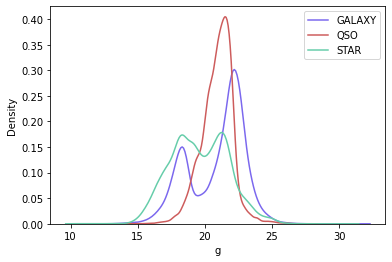

In [16]:
for i in range(3):
    sns.kdeplot(data=sdss17_df_no_sun[sdss17_df_no_sun["class"] == i]['g'], label = le.inverse_transform([i]), color=colors[i])

plt.legend(Classes);

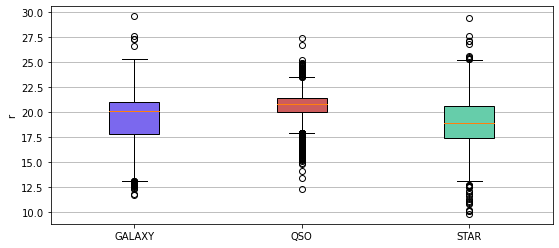

In [17]:
data = [galaxy['r'], qso['r'], star['r']]

fig, ax1 = plt.subplots(figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=Classes)  # will be used to label x-ticks

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines

ax1.yaxis.grid(True)
#ax.set_xlabel('Three separate samples')
ax1.set_ylabel('r')

plt.savefig('img/rbox.png')
plt.show()

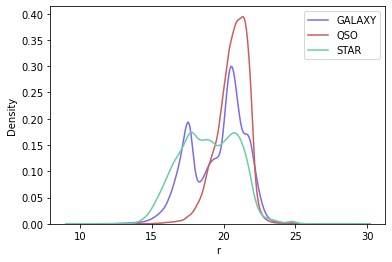

In [18]:
for i in range(3):
    sns.kdeplot(data=sdss17_df_no_sun[sdss17_df_no_sun["class"] == i]['r'], label = le.inverse_transform([i]), color=colors[i])

plt.legend(Classes);

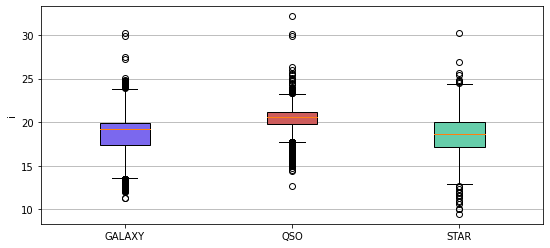

In [19]:
data = [galaxy['i'], qso['i'], star['i']]

fig, ax1 = plt.subplots(figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=Classes)  # will be used to label x-ticks

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines

ax1.yaxis.grid(True)
#ax.set_xlabel('Three separate samples')
ax1.set_ylabel('i')

plt.savefig('img/ibox.png')
plt.show()

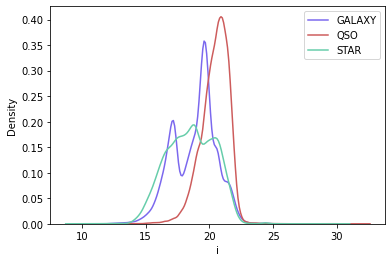

In [20]:
for i in range(3):
    sns.kdeplot(data=sdss17_df_no_sun[sdss17_df_no_sun["class"] == i]['i'], label = le.inverse_transform([i]), color=colors[i])

plt.legend(Classes);

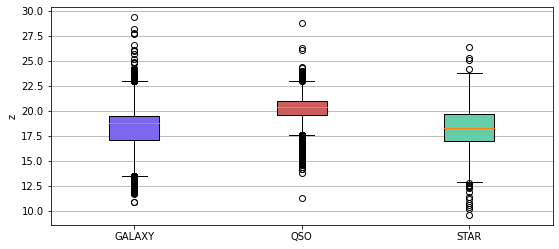

In [85]:

data = [galaxy['z'], qso['z'], star['z']]

fig, ax1 = plt.subplots(figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=Classes)  # will be used to label x-ticks

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

# adding horizontal grid lines

ax1.yaxis.grid(True)
#ax.set_xlabel('Three separate samples')
ax1.set_ylabel('z')

plt.savefig('img/zbox.png')
plt.show()

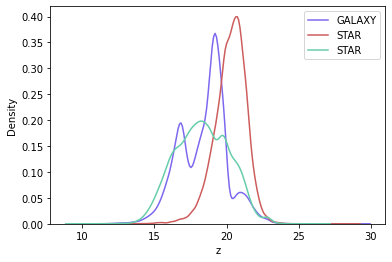

In [26]:
for i in range(3):
    sns.kdeplot(data=sdss17_df_no_sun[sdss17_df_no_sun["class"] == i]['z'], label = le.inverse_transform([i]), color=colors[i])

plt.legend(Classes);

In [27]:
#Classes = sdss17_df_no_sun['Class'].uniquevalues()
sdss17_df_no_sun

,u,g,r,i,z,class,redshift
0,23.87882,22.27530,20.39501,19.16573,18.79371,0,0.634794
1,24.77759,22.83188,22.58444,21.16812,21.61427,0,0.779136
2,25.26307,22.66389,20.60976,19.34857,18.94827,0,0.644195
3,22.13682,23.77656,21.61162,20.50454,19.25010,0,0.932346
4,19.43718,17.58028,16.49747,15.97711,15.54461,0,0.116123
...,...,...,...,...,...,...,...
99995,22.16759,22.97586,21.90404,21.30548,20.73569,0,0.000000
99996,22.69118,22.38628,20.45003,19.75759,19.41526,0,0.404895
99997,21.16916,19.26997,18.20428,17.69034,17.35221,0,0.143366
99998,25.35039,21.63757,19.91386,19.07254,18.62482,0,0.455040


### Separate the features from the class variable

In [13]:
sdss17_features = sdss17_df_no_anomaly.drop('class', axis=1, inplace=False)
sdss17_class_categorical = sdss17_df_no_anomaly['class']
classes = sdss17_class_categorical.unique() # redundant - should be created earlier

print(sdss17_features.columns)
print(sdss17_class_categorical)

Index(['u', 'g', 'r', 'i', 'z', 'redshift'], dtype='object')
0        GALAXY
1        GALAXY
2        GALAXY
3        GALAXY
4        GALAXY
          ...  
99995    GALAXY
99996    GALAXY
99997    GALAXY
99998    GALAXY
99999    GALAXY
Name: class, Length: 99999, dtype: object


In [14]:
sdss17_class_categorical.head()

0    GALAXY
1    GALAXY
2    GALAXY
3    GALAXY
4    GALAXY
Name: class, dtype: object

## Train test split
* 67% 33% Train Test split

In [15]:

X_train, X_test, y_train, y_test = train_test_split(
    sdss17_features,
    sdss17_class_categorical,
    test_size=0.33,
    random_state=1000)

In [16]:
print(y_train)

92305      STAR
1527     GALAXY
97404    GALAXY
38370      STAR
85950    GALAXY
          ...  
58716    GALAXY
18782    GALAXY
3776       STAR
71751    GALAXY
70231      STAR
Name: class, Length: 66999, dtype: object


Size of Training set (66999) + Size of Testing set (33000) = 99999 = Size of Original Set (100000)


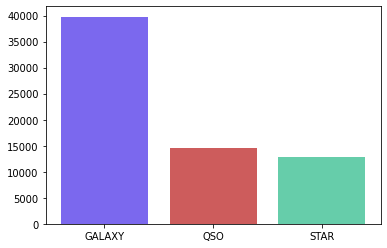

In [17]:
class_frequency = y_train.value_counts()

print(f"Size of Training set ({len(X_train)}) + Size of Testing set ({len(X_test)}) = {len(X_train) + len(X_test)} = Size of Original Set ({num_rows})")

color = ['mediumslateblue', 'indianred', 'mediumaquamarine']
plt.bar(classes, class_frequency, color=color)
#plt.savefig('img/trainclassimbalance.png')
plt.show()

The Class distribution is imbalanced. A classifer model will be biased toward the Class that is most frequent.

## Class Balancing with SMOTE

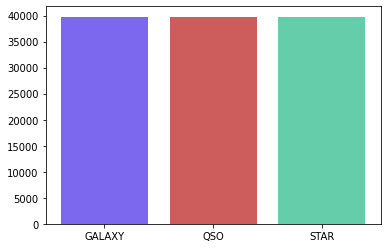

In [18]:
smote = SMOTE(random_state=1000)

X_train_balance, y_train_balance = smote.fit_resample(X_train, y_train)

class_frequency = y_train_balance.value_counts()

plt.bar(classes, class_frequency, color=color)
#plt.savefig('img/testbalance.png')
plt.show()

## Saving the files DFs as CSV

In [19]:
X_train_balance.to_csv('data/ClassBalanced/xtrain.csv', index=False)
y_train_balance.to_csv('data/ClassBalanced/ytrain.csv', index=False)
X_test.to_csv('data/xtest.csv', index=False)
y_test.to_csv('data/ytest.csv', index=False) # not class balanced

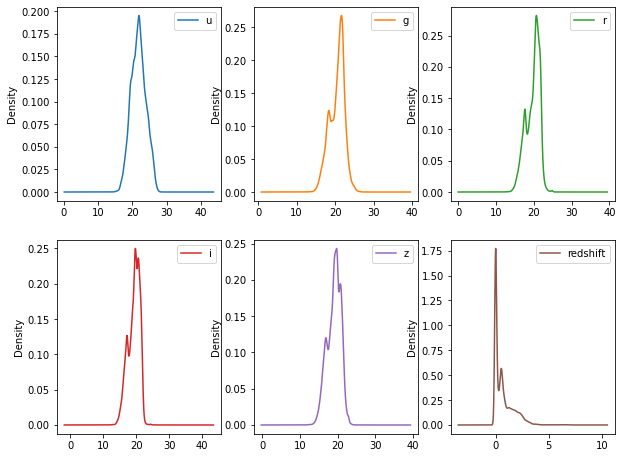

In [35]:
X_train_balance.plot(kind='density',
                     subplots=True,
                     layout=(6,3),
                     sharex=False,
                     figsize=(10, 25))
plt.show()

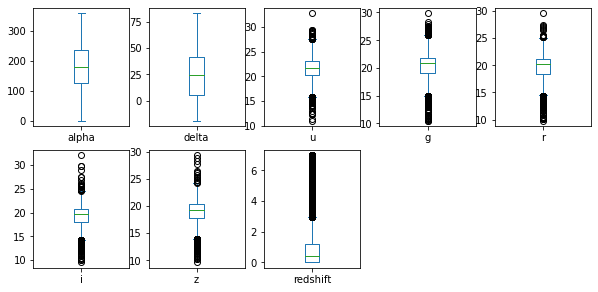

In [95]:
X_train_balance.plot(kind='box', subplots=True, layout=(4,5), sharex=False, sharey=False, figsize=(10,10))
plt.show()

Get the scatterplots for just a few features to demonstrate the complexity of the relationship between variables

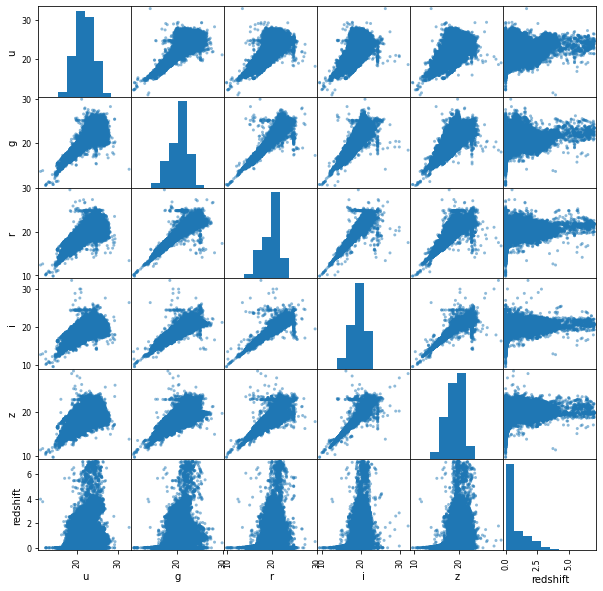

In [36]:
scatter_matrix(X_train_balance, figsize=[10,10])
plt.show()

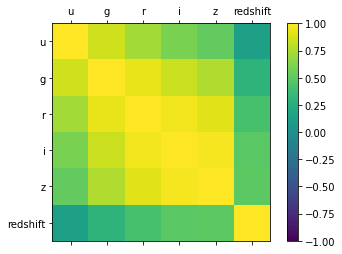

In [21]:
corr = X_train_balance.corr()
fig = plt.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(corr, vmin=-1, vmax=1) 
fig.colorbar(cax) 
ticks = np.arange(0,6,1) 
ax.set_xticks(ticks) 
ax.set_yticks(ticks) 
ax.set_xticklabels(['u', 'g', 'r', 'i', 'z', 'redshift']) 
ax.set_yticklabels(['u', 'g', 'r', 'i', 'z', 'redshift']) 
plt.show()